# Keras - Classification

In this jupyter notebook I have explained on how we can use Neural networks to solve classification tasks using Tensorflow keras library.<br>
You can download the dataset from the following [Link](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset
df = pd.read_csv('Breast cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Changing the 'diagnosis' column values to binary outcomes. 0 - Negative, Malign - 1

In [3]:
ben_0_mal_1 = pd.get_dummies(df['diagnosis'], drop_first=True, dtype = float)
ben_0_mal_1

,M
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
564,1.0
565,1.0
566,1.0
567,1.0


In [4]:
ben_0_mal_1.value_counts()

M  
0.0    357
1.0    212
dtype: int64

In [5]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
# Concatenating the 2 dataframes together
df = pd.concat([ben_0_mal_1, df], axis = 1)
df.head()

,M,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,1.0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,1.0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,1.0,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,1.0,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,1.0,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
# Renaming the column
df = df.rename(columns =  {'M' : 'Ben_0_Mal_1'})
df.head()

,Ben_0_Mal_1,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,1.0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,1.0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,1.0,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,1.0,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,1.0,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ben_0_Mal_1              569 non-null    float64
 1   id                       569 non-null    int64  
 2   diagnosis                569 non-null    object 
 3   radius_mean              569 non-null    float64
 4   texture_mean             569 non-null    float64
 5   perimeter_mean           569 non-null    float64
 6   area_mean                569 non-null    float64
 7   smoothness_mean          569 non-null    float64
 8   compactness_mean         569 non-null    float64
 9   concavity_mean           569 non-null    float64
 10  concave points_mean      569 non-null    float64
 11  symmetry_mean            569 non-null    float64
 12  fractal_dimension_mean   569 non-null    float64
 13  radius_se                569 non-null    float64
 14  texture_se               5

In [9]:
df.drop('Unnamed: 32', axis = 1, inplace = True)
df.drop('id', axis = 1, inplace = True)
df.drop('diagnosis', axis = 1, inplace = True)
df.head()

,Ben_0_Mal_1,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


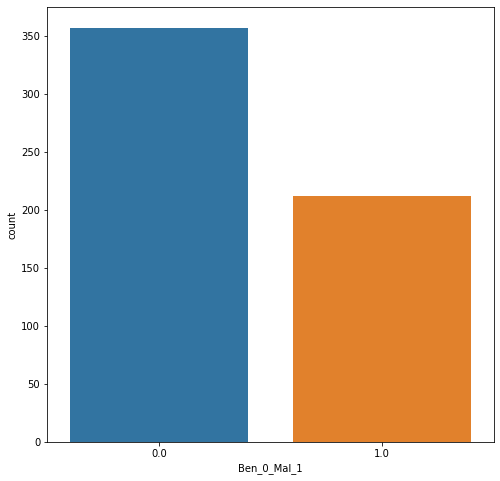

In [10]:
# Countplot of Dignosis column
plt.figure(figsize=(8,8))
sns.countplot(x = df['Ben_0_Mal_1'], data = df)
plt.show()

In [11]:
# Finding out the co-relations
df.corr()

,Ben_0_Mal_1,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
Ben_0_Mal_1,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [12]:
# Finding out co-relations of different features with 'Ben_0_Mal_1'
df.corr()['Ben_0_Mal_1'].sort_values()[:-1]

smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0.776454
concave points_mean        0

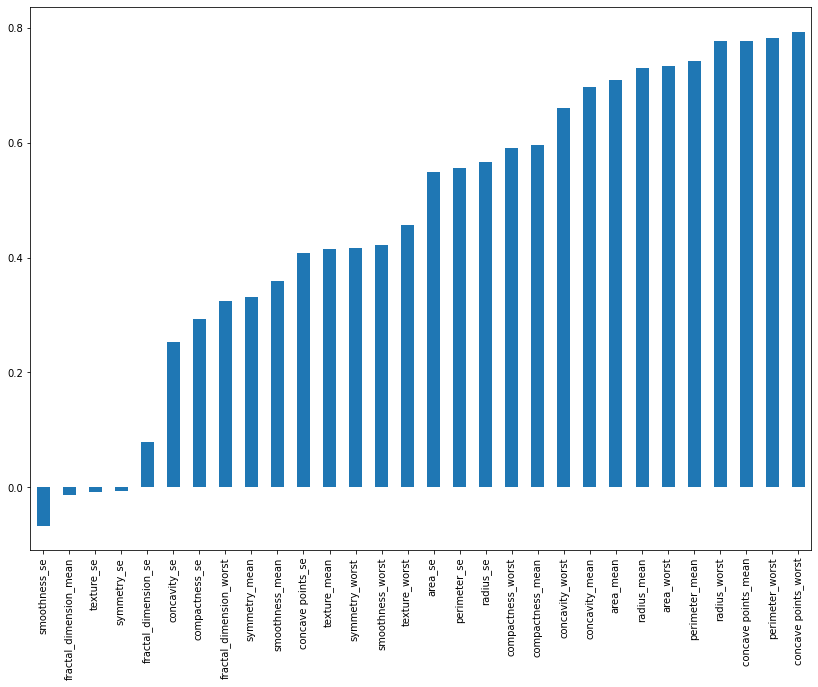

In [13]:
# Bar plot for different co-relations
plt.figure(figsize=(14,10))
df.corr()['Ben_0_Mal_1'].sort_values()[:-1].plot(kind = 'bar')
plt.show()

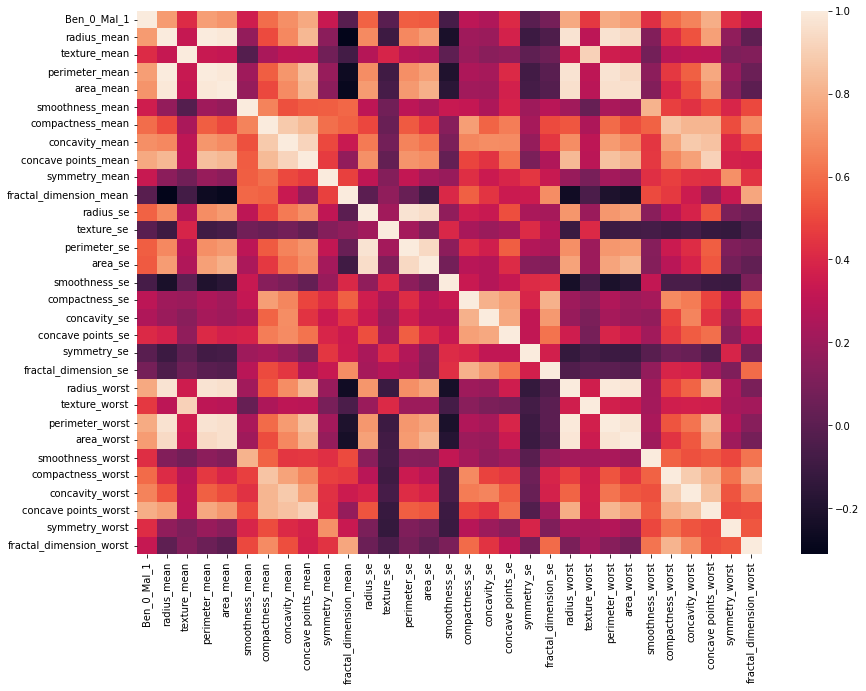

In [14]:
# Plotting a heatmap
plt.figure(figsize=(14,10))
sns.heatmap(df.corr())
plt.show()

### Extracting the features and labels

In [15]:
df.head()

,Ben_0_Mal_1,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
X = df.drop('Ben_0_Mal_1', axis = 1).values # Features
y = df['Ben_0_Mal_1'].values # Labels

### Train test split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [18]:
# Original values
X_train

array([[1.317e+01, 1.822e+01, 8.428e+01, ..., 1.045e-01, 2.235e-01,
        6.925e-02],
       [1.262e+01, 1.715e+01, 8.062e+01, ..., 9.851e-02, 3.270e-01,
        7.330e-02],
       [1.480e+01, 1.766e+01, 9.588e+01, ..., 8.308e-02, 3.600e-01,
        7.285e-02],
       ...,
       [1.607e+01, 1.965e+01, 1.041e+02, ..., 1.520e-01, 2.650e-01,
        6.387e-02],
       [1.877e+01, 2.143e+01, 1.229e+02, ..., 2.048e-01, 3.679e-01,
        9.870e-02],
       [1.371e+01, 1.868e+01, 8.873e+01, ..., 1.284e-01, 2.849e-01,
        9.031e-02]])

In [19]:
 from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [20]:
X_train = scaler.fit_transform(X_train)

# We dont fit to our test set because we do not want to assume prior information about test set
X_test = scaler.transform(X_test)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [22]:
# We see that the values are scaled and transformed
X_train

array([[0.30280346, 0.28779168, 0.28292922, ..., 0.35910653, 0.13207175,
        0.09320478],
       [0.27589412, 0.25160636, 0.25735448, ..., 0.33852234, 0.33609304,
        0.11976912],
       [0.38255296, 0.26885357, 0.36398575, ..., 0.28549828, 0.40114331,
        0.11681753],
       ...,
       [0.44468907, 0.3361515 , 0.42142408, ..., 0.52233677, 0.21387739,
        0.05791683],
       [0.57678947, 0.39634765, 0.55279156, ..., 0.70378007, 0.41671595,
        0.2863702 ],
       [0.32922354, 0.30334799, 0.31402418, ..., 0.44123711, 0.25310467,
        0.23133937]])

In [23]:
# Defining the model
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# Binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [24]:
# Training the model
model.fit(x = X_train, y = y_train, epochs = 600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 1s 16ms/step - loss: 0.6879 - val_loss: 0.6567
Epoch 2/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6464 - val_loss: 0.6185
Epoch 3/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6045 - val_loss: 0.5756
Epoch 4/600
14/14 [==============================] - 0s 9ms/step - loss: 0.5588 - val_loss: 0.5286
Epoch 5/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5105 - val_loss: 0.4771
Epoch 6/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4589 - val_loss: 0.4250
Epoch 7/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4098 - val_loss: 0.3779
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3661 - val_loss: 0.3346
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3288 - val_loss: 0.2973
Epoch 10/600
14/14 [==============================] - 0s 8ms/step - loss: 0.2964 - val_loss: 0.2658
Epoch 11

14/14 [==============================] - 0s 7ms/step - loss: 0.0541 - val_loss: 0.1063
Epoch 84/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0526 - val_loss: 0.1040
Epoch 85/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0529 - val_loss: 0.1044
Epoch 86/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0530 - val_loss: 0.1053
Epoch 87/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0555 - val_loss: 0.1028
Epoch 88/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0524 - val_loss: 0.1027
Epoch 89/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0517 - val_loss: 0.1056
Epoch 90/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0543 - val_loss: 0.1020
Epoch 91/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0514 - val_loss: 0.1068
Epoch 92/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0510 - val_loss: 0.1017
Epoch 93/600


14/14 [==============================] - 0s 6ms/step - loss: 0.0394 - val_loss: 0.1248
Epoch 165/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0418 - val_loss: 0.1175
Epoch 166/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0439 - val_loss: 0.1222
Epoch 167/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0410 - val_loss: 0.1210
Epoch 168/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0388 - val_loss: 0.1168
Epoch 169/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0395 - val_loss: 0.1257
Epoch 170/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0385 - val_loss: 0.1182
Epoch 171/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0394 - val_loss: 0.1175
Epoch 172/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0391 - val_loss: 0.1210
Epoch 173/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0380 - val_loss: 0.1250
Epoc

14/14 [==============================] - 0s 7ms/step - loss: 0.0288 - val_loss: 0.1365
Epoch 246/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0292 - val_loss: 0.1464
Epoch 247/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0276 - val_loss: 0.1321
Epoch 248/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0303 - val_loss: 0.1344
Epoch 249/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0271 - val_loss: 0.1371
Epoch 250/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0271 - val_loss: 0.1380
Epoch 251/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0272 - val_loss: 0.1409
Epoch 252/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0292 - val_loss: 0.1388
Epoch 253/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0280 - val_loss: 0.1343
Epoch 254/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0272 - val_loss: 0.1387
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0200 - val_loss: 0.1346
Epoch 327/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0204 - val_loss: 0.1379
Epoch 328/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0204 - val_loss: 0.1391
Epoch 329/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0197 - val_loss: 0.1341
Epoch 330/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0234 - val_loss: 0.1465
Epoch 331/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0222 - val_loss: 0.1359
Epoch 332/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0210 - val_loss: 0.1415
Epoch 333/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0197 - val_loss: 0.1435
Epoch 334/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0196 - val_loss: 0.1413
Epoch 335/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0193 - val_loss: 0.1383
Epoc

14/14 [==============================] - 0s 7ms/step - loss: 0.0142 - val_loss: 0.1365
Epoch 408/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0157 - val_loss: 0.1535
Epoch 409/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0168 - val_loss: 0.1445
Epoch 410/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0170 - val_loss: 0.1333
Epoch 411/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0158 - val_loss: 0.1478
Epoch 412/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0144 - val_loss: 0.1415
Epoch 413/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0136 - val_loss: 0.1404
Epoch 414/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0130 - val_loss: 0.1387
Epoch 415/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0137 - val_loss: 0.1413
Epoch 416/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0132 - val_loss: 0.1353
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0101 - val_loss: 0.1466
Epoch 489/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0102 - val_loss: 0.1504
Epoch 490/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0096 - val_loss: 0.1574
Epoch 491/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0094 - val_loss: 0.1609
Epoch 492/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0102 - val_loss: 0.1555
Epoch 493/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0091 - val_loss: 0.1527
Epoch 494/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0091 - val_loss: 0.1505
Epoch 495/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0096 - val_loss: 0.1516
Epoch 496/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0106 - val_loss: 0.1582
Epoch 497/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0095 - val_loss: 0.1557
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0071 - val_loss: 0.1713
Epoch 570/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0064 - val_loss: 0.1811
Epoch 571/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0067 - val_loss: 0.1737
Epoch 572/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0064 - val_loss: 0.1710
Epoch 573/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0066 - val_loss: 0.1778
Epoch 574/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0085 - val_loss: 0.1961
Epoch 575/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0078 - val_loss: 0.1733
Epoch 576/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0079 - val_loss: 0.1855
Epoch 577/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0082 - val_loss: 0.1867
Epoch 578/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0092 - val_loss: 0.1705
Epoc

In [25]:
# creating a dataframe of losses
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,val_loss
0,0.687864,0.656748
1,0.646380,0.618486
2,0.604478,0.575606
3,0.558795,0.528647
4,0.510497,0.477106


<AxesSubplot:>

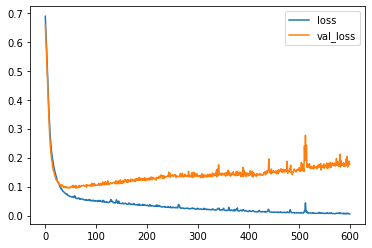

In [26]:
losses.plot()

<b> We see from the above figure that the learning curves show that data is overfitting (val loss starts after certain extent). We observe that we are training our model for higher number of epochs than required</b>

### To overcome this issue we can introduce early stopping

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
# Defining the model
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# Binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience = 25)

model.fit(x =X_train, y = y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 13ms/step - loss: 0.7156 - val_loss: 0.6811
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6759 - val_loss: 0.6514
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6423 - val_loss: 0.6174
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6029 - val_loss: 0.5741
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5605 - val_loss: 0.5342
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5195 - val_loss: 0.4908
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4743 - val_loss: 0.4466
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4300 - val_loss: 0.4006
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3822 - val_loss: 0.3449
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3343 - val_loss: 0.3043
Epoch 11

### We see that model automatically stops training after 66 epochs

In [29]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,val_loss
0,0.715601,0.681148
1,0.675896,0.651437
2,0.642329,0.617397
3,0.602877,0.574064
4,0.560547,0.534249


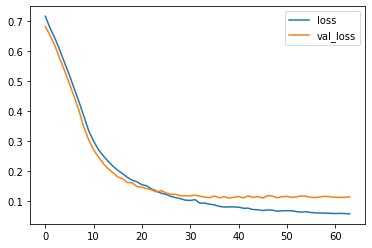

In [30]:
model_loss.plot()
plt.show()

<b>This is an accurate training of a model where we can see that model is training for only a limited number of epochs and is not overfitting </b>

### Dropout
We can also introduce dropout layers to overcome overfitting. Inserting these dropout layers automatically drop the desired percentage (defined by user) of neurons in a Neural network

In [31]:
from tensorflow.keras.layers import Dropout

In [32]:
# Defining the model
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

# Binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience = 25)

model.fit(x =X_train, y = y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.7098 - val_loss: 0.6908
Epoch 2/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6763 - val_loss: 0.6695
Epoch 3/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6604 - val_loss: 0.6506
Epoch 4/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6395 - val_loss: 0.6269
Epoch 5/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6247 - val_loss: 0.6056
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6025 - val_loss: 0.5824
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5990 - val_loss: 0.5624
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5622 - val_loss: 0.5320
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5403 - val_loss: 0.4989
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5225 - val_loss: 0.4601
Epoch 11

14/14 [==============================] - 0s 6ms/step - loss: 0.1047 - val_loss: 0.1005
Epoch 84/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1097 - val_loss: 0.1045
Epoch 85/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0925 - val_loss: 0.1024
Epoch 86/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0848 - val_loss: 0.1051
Epoch 87/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1080 - val_loss: 0.1035
Epoch 88/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0946 - val_loss: 0.1089
Epoch 89/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0986 - val_loss: 0.1048
Epoch 90/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0981 - val_loss: 0.1032
Epoch 91/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0996 - val_loss: 0.1031
Epoch 92/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1043 - val_loss: 0.1112
Epoch 93/600


In [33]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,val_loss
0,0.709774,0.690775
1,0.676297,0.669548
2,0.660409,0.650627
3,0.639494,0.626890
4,0.624703,0.605562


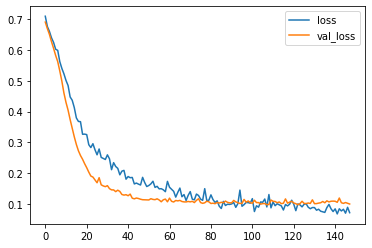

In [34]:
model_loss.plot()
plt.show()

This plot has significantly improved performance of our model and both losses are converging well and have a similar trend


## Predicition

In [35]:
predictions = (model.predict(X_test) > 0.5).astype('int32')
predictions

array([[0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
    

In [36]:
# For classification tasks we import these two metrics
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        88
         1.0       0.98      0.98      0.98        55

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [38]:
print(confusion_matrix(y_test, predictions))

[[87  1]
 [ 1 54]]
